<a href="https://colab.research.google.com/github/plaban1981/Transformers-Tutorials/blob/master/Copy_of_Indian_Food_Translator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/huggingface/education-toolkit/blob/main/02_ml-demos-with-gradio.ipynb)


Transformers Pipeline Demo Notebook

💡 **Welcome!**

This notebook is a self-contained way to start using widely known Open Source technologies (`transformers`, `gradio`, etc). The core use case is getting familiar with Transformers and building a web application. 
- This notebook can be found at [https://bit.ly/raj_food](https://bit.ly/raj_food)
- The accompanying slides are at [****](https://github.com/rajshah4/huggingface-demos/tree/main/foodapp). 
- A version of the app in spaces, [Indian Food Translator app](https://huggingface.co/spaces/rajistics/Indian_food_translator).


In [1]:
!pip install --quiet git+https://github.com/huggingface/transformers.git 
!pip install --quiet gradio
!pip install --quiet datasets
import os

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.6 MB 29.8 MB/s 
     |████████████████████████████████| 596 kB 63.5 MB/s 
     |████████████████████████████████| 101 kB 11.5 MB/s 
     |████████████████████████████████| 5.6 MB 19.2 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 57 kB 5.0 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 272 kB 68.3 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 140 kB 73.4 MB/s 
     |████████████████████████████████| 1.1 MB 33.2 MB/s 
     |████████████████████████████████| 2.3 MB 57.1 MB/s 
     |████████████████████████████████| 212 kB 60.6 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 271 kB 68.2 MB/s 
     |████████

# Tutorial: Using Pretrained Models and Building Demos with Gradio ⚡ & Hugging Face 🤗 

**Learning goals:** The goal of this tutorial is to learn How To

1. Use pre-trained models from the transformers library and that are available on the Hugging Face Hub
2. Building a web demo, [Indian Food Detector](https://huggingface.co/spaces/rajistics/Indian_food_translator)

**Duration**: 45 minutes

**Prerequisites:** Knowledge of Python and basic familiarity with machine learning 

**Author**: [Rajiv Shah](https://twitter.com/rajistics) (feel free to ping me with any questions about this tutorial) 

All of these steps can be done for free! All you need is an Internet browser and a place where you can write Python 👩‍💻

# Let's Start by Exploring Tasks at Hugging Face Hub
[Hugging Face Tasks](https://hf.co/tasks) 

---

[Automated Speech Recognition](https://huggingface.co/tasks/automatic-speech-recognition)

[Object Detection](https://huggingface.co/tasks/object-detection)

[Summarization](https://huggingface.co/tasks/summarization)


## Let's Run Pretrained Models using Python

The [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) supports many common tasks out-of-the-box:

**Text**:
* Sentiment analysis: classify the polarity of a given text.
* Text generation (in English): generate text from a given input.
* Name entity recognition (NER): label each word with the entity it represents (person, date, location, etc.).
* Question answering: extract the answer from the context, given some context and a question.
* Fill-mask: fill in the blank given a text with masked words.
* Summarization: generate a summary of a long sequence of text or document.
* Translation: translate text into another language.
* Feature extraction: create a tensor representation of the text.

**Image**:
* Image classification: classify an image.
* Image segmentation: classify every pixel in an image.
* Object detection: detect objects within an image.

**Audio**:
* Audio classification: assign a label to a given segment of audio.
* Automatic speech recognition (ASR): transcribe audio data into text.

<Tip>

For more details about the [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) and associated tasks, refer to the documentation [here](https://huggingface.co/docs/transformers/main/en/./main_classes/pipelines).


###Text

In [2]:
#Sentiment Analysis
from transformers import pipeline
sent_classifier = pipeline("sentiment-analysis")
sent_classifier("I was pretty unhappy with the sneakers")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9997267127037048}]

## Default Model used by HuggingFace
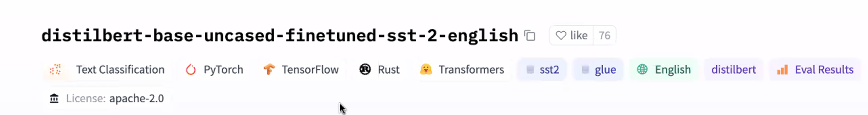

In [3]:
#Text Generation
generator = pipeline("text-generation")
generator("In this course, we will teach you how to")
#generator("Once upon a time,")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to write the highest-level Java code using Java 8. We will see how to provide the latest security updates on some of the most popular frameworks, and provide you with a full demonstration of how to write'}]

In [5]:
generator("Once upon a time,")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Once upon a time, it was known that many of our friends were the same as us in both social and intellectual spheres. And this means that they shared some common traits of their own. For example we all thought each other was smart and wise but'}]

###Image

In [4]:
vision_classifier = pipeline(task="image-classification")
result = vision_classifier(
    images="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
print("\n".join([f"Class {d['label']} with score {round(d['score'], 4)}" for d in result]))

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


Class lynx, catamount with score 0.4403
Class cougar, puma, catamount, mountain lion, painter, panther, Felis concolor with score 0.0343
Class snow leopard, ounce, Panthera uncia with score 0.0321
Class Egyptian cat with score 0.0235
Class tiger cat with score 0.023


## Download the images

In [ ]:
!wget "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"

--2022-07-21 13:41:53--  https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg
Resolving huggingface.co (huggingface.co)... 35.174.43.234, 54.84.221.13, 2600:1f18:147f:e850:9160:5f96:9bd8:5689, ...
Connecting to huggingface.co (huggingface.co)|35.174.43.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56308 (55K) [image/jpeg]
Saving to: ‘pipeline-cat-chonk.jpeg’

pipeline-cat-chonk. 100%[===================>]  54.99K  --.-KB/s    in 0.1s    

2022-07-21 13:41:53 (444 KB/s) - ‘pipeline-cat-chonk.jpeg’ saved [56308/56308]



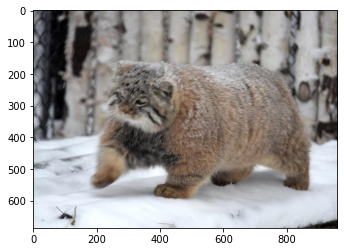

In [ ]:
import PIL
import matplotlib.pyplot as plt
images="/content/pipeline-cat-chonk.jpeg"
plt.imshow(PIL.Image.open(images))
plt.show()

### Translation Model

## Model Card
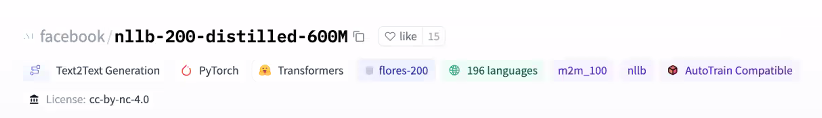

In [6]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
#Background on the model: https://huggingface.co/facebook/nllb-200-distilled-600M
#Get list of language codes: https://github.com/facebookresearch/flores/tree/main/flores200#languages-in-flores-200

model = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")
tokenizer = AutoTokenizer.from_pretrained("facebook/nllb-200-distilled-600M")

translator = pipeline('translation', model=model, tokenizer=tokenizer, src_lang="eng_Latn", tgt_lang='ron_Latn')

translator("UN Chief says there is no military solution in Syria")

[{'translation_text': 'Şeful ONU spune că nu există o soluţie militară în Siria'}]

In [7]:
translator = pipeline('translation', model=model, tokenizer=tokenizer, src_lang="eng_Latn", tgt_lang='asm_Beng')

translator("UN Chief says there is no military solution in Syria")

[{'translation_text': 'ৰাষ্ট্ৰসংঘৰ প্ৰধান মন্ত্ৰীয়ে কয় যে ছুৰীয়াত কোনো সামৰিক সমাধান নাই।'}]

Language Codes:  
ace_Arab - Acehnese (Arabic script)

asm_Beng - Assamese

bel_cyrl - Belarusian

bod_Tibt - Standard Tibetan

guj_Gujr - Gujarati

kmr+Latn - Northern Kurdish

tir_Ethi - Tigrinya

yue_Hant - Yue Chinese


## Fine Tuned Pretrained Models

Their are thousands of models available that are trained for specific tasks. You can also [fine tune](https://huggingface.co/docs/transformers/training) pre-trained models on your own data to solve your particular tasks.

### Finetuned FinBERT for Forward Looking Statements

[FinBERT-FLS](https://huggingface.co/yiyanghkust/finbert-fls) is model developed for identifying Forward-looking statements (FLS). These statements inform investors of managers’ beliefs and opinions about firm's future events or results. Identifying forward-looking statements from corporate reports can assist investors in financial analysis. FinBERT-FLS is a FinBERT model fine-tuned on 3,500 manually annotated sentences from Management Discussion and Analysis section of annual reports of Russell 3000 firms.

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-fls")

model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-fls")


nlp = pipeline("text-classification", model=model, tokenizer=tokenizer)
results = nlp('In the past, the age of our fleet to enhance availability and reliability due to reduced downtime for repairs.')
print(results) 

[{'label': 'Not FLS', 'score': 0.9775024056434631}]


## Inference Pipelines from Hugging Face

For production use, you can use the [inference API](https://huggingface.co/inference-api) to get predictions via simple API calls.  To get the snippet, just go here
![](https://i.ibb.co/P9yyTHg/Screen-Shot-2022-07-01-at-10-30-20-AM.png)

In [ ]:
# Example Snippet
import requests

API_URL = "https://api-inference.huggingface.co/models/yiyanghkust/finbert-fls"
headers = {"Authorization": "Bearer {API_TOKEN}"}   ###Add your API Key here after Bearer

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()
	
output = query({
	"inputs": "In the past, the age of our fleet to enhance availability and reliability due to reduced downtime for repairs.",
})

### Image Classification for Indian Food

[Indian Food Detector](https://huggingface.co/rajistics/finetuned-indian-food) is a pretrained model available at the Hugging Face hub.  It was fined tuned using the [indian food dataset](https://huggingface.co/datasets/rajistics/indian_food_images).

In [11]:
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
extractor = AutoFeatureExtractor.from_pretrained("rajistics/finetuned-indian-food")
model = AutoModelForImageClassification.from_pretrained("rajistics/finetuned-indian-food")

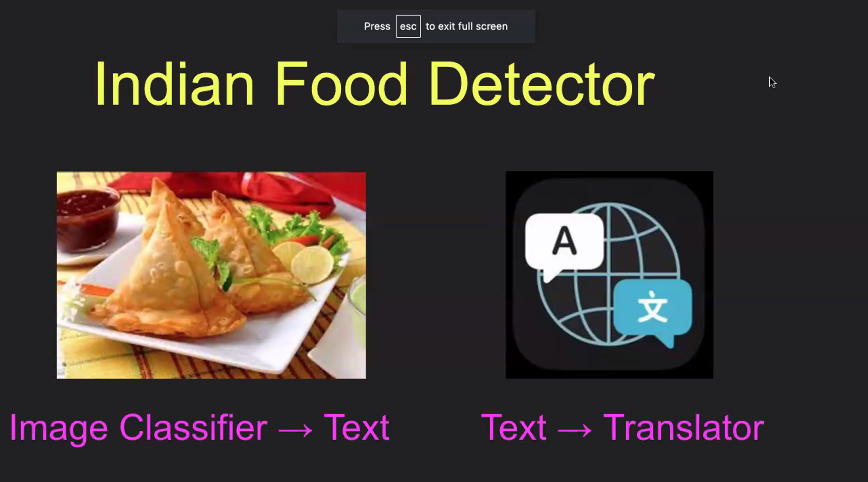

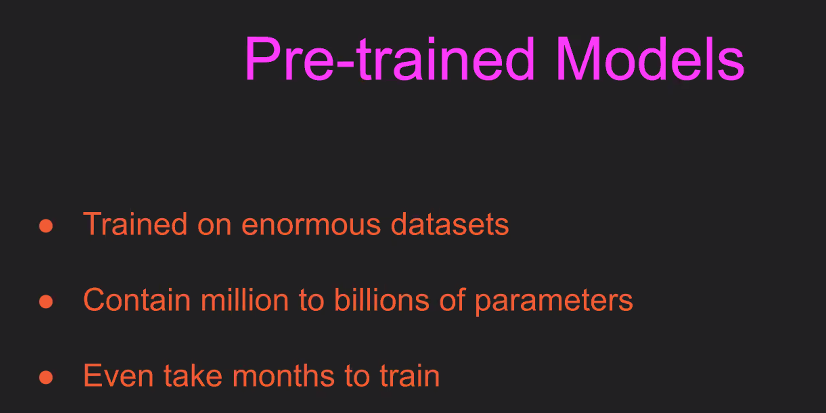

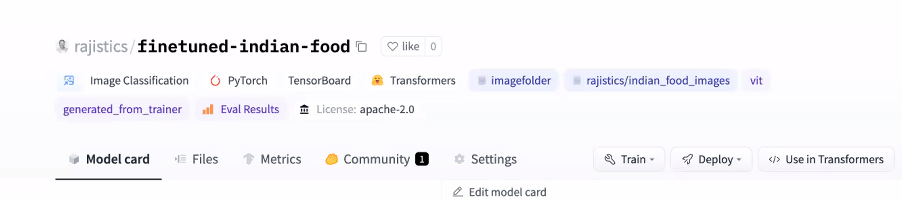

In [8]:
#let's get an image to test with using streaming option
from datasets import load_dataset
dataset = load_dataset("rajistics/indian_food_images",split='test', streaming=True)

Downloading:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

Using custom data configuration rajistics--indian_food_images-04b26e3cc3758ac1


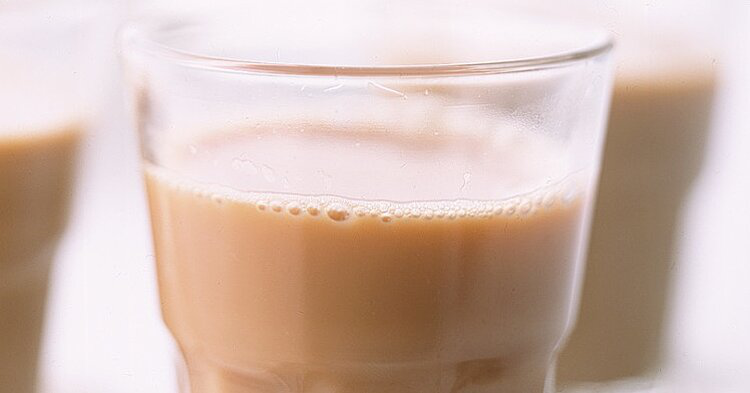

In [9]:
imagepic = next(iter(dataset))['image']
imagepic

In [12]:
from PIL import Image

inputs = extractor(images=imagepic, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: chai


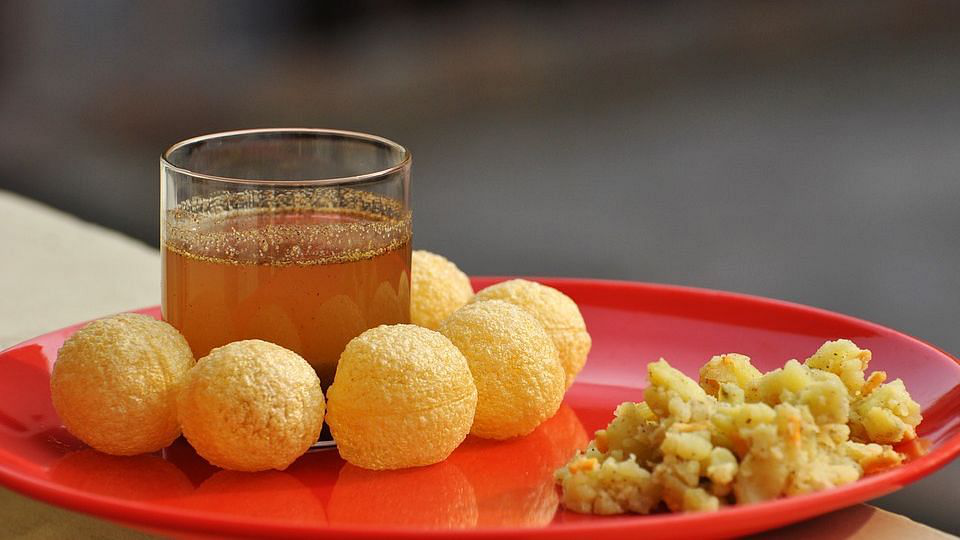

In [13]:
import requests
im_url = Image.open(requests.get('https://huggingface.co/rajistics/finetuned-indian-food/resolve/main/126.jpg', stream=True).raw)
im_url

In [ ]:
inputs = extractor(images=im_url, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: paani_puri


# Let's Build a Demo

**Demos** of machine learning models are an increasingly important part of machine learning. Demos allow:

* model developers to easily **present** their work to a wide audience
* increase **reproducibility** of machine learning research
* diverse users to more easily **identify and debug** failure points of models


As a quick example of what we would like to build, check out the [Keras Org on Hugging Face](https://huggingface.co/keras-io), which includes a description card and a collection of Models and Spaces built by Keras community. Any Space can be opened in your browser and you can use the model immediately, as shown here: 

![](https://i.ibb.co/7y6DGjB/ezgif-5-cc52b7e590.gif)




## 1. Build Quick ML Demos in Python Using the Gradio Library

`gradio` is a handy Python library that lets you build web demos simply by specifying the list of input and output **components** expected by your machine learning model. 

For more detail [see the docs](https://gradio.app/docs/)

In addition to the input and output types, Gradio expects a third parameter, which is the prediction function itself. This parameter can be ***any* regular Python function** that takes in parameter(s) corresponding to the input component(s) and returns value(s) corresponding to the output component(s)

Enough words. Let's see some code!

###Creating an Interface

In [ ]:
import gradio as gr
def greet(name):
    return "Hello " + name + "!!"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")
demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://46728.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f1689956b50>,
 'http://127.0.0.1:7860/',
 'https://46728.gradio.app')

In [ ]:
import gradio as gr

gr.Interface.load("huggingface/facebook/fastspeech2-en-ljspeech").launch();



Fetching model from: https://huggingface.co/facebook/fastspeech2-en-ljspeech
Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://12694.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
from PIL import Image

##Image Classification
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
extractor = AutoFeatureExtractor.from_pretrained("rajistics/finetuned-indian-food")
model = AutoModelForImageClassification.from_pretrained("rajistics/finetuned-indian-food")

def image_to_text(imagepic):
  inputs = extractor(images=imagepic, return_tensors="pt")
  outputs = model(**inputs)
  logits = outputs.logits
  predicted_class_idx = logits.argmax(-1).item()
  return (model.config.id2label[predicted_class_idx])

##Translation
#from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
#Get list of language codes: https://github.com/facebookresearch/flores/tree/main/flores200#languages-in-flores-200
#modelt = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")
#tokenizert = AutoTokenizer.from_pretrained("facebook/nllb-200-distilled-600M")

#def translation(text):
#  translator = pipeline('translation', model=modelt, tokenizer=tokenizert, src_lang="eng_Latn", tgt_lang='ron_Latn')
#  output = translator(text)
# return (output[0]['translation_text'])

##Translation
demo = gr.Blocks()
with demo:
    image_file = gr.Image(type="pil")
    b1 = gr.Button("Recognize Image")
    text = gr.Textbox()
    b1.click(image_to_text, inputs=image_file, outputs=text)
    #b2 = gr.Button("Translation")
    #out1 = gr.Textbox()
    #b2.click(translation, inputs=text, outputs=out1)
demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://15000.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f1689943550>,
 'http://127.0.0.1:7862/',
 'https://15000.gradio.app')

## 2. Host the Demo (for free) on Hugging Face Spaces

Once you made a Gradio demo, you can host it permanently on Hugging Spaces very easily:

Here are the steps to that (shown in the GIF below):

A. First, create a Hugging Face account if you do not already have one, by visiting https://huggingface.co/ and clicking "Sign Up"

B. Once you are logged in, click on your profile picture and then click on "New Space" underneath it to get to this page: https://huggingface.co/new-space

C. Give your Space a name and a license. Select "Gradio" as the Space SDK, and then choose "Public" if you are fine with everyone accessing your Space and the underlying code

D. Then you will find a page that provides you instructions on how to upload your files into the Git repository for that Space. You may also need to add a `requirements.txt` file to specify any Python package dependencies.

E. Once you have pushed your files, that's it! Spaces will automatically build your Gradio demo allowing you to share it with anyone, anywhere!

![GIF](https://huggingface.co/blog/assets/28_gradio-spaces/spaces-demo-finalized.gif)





Check out the final version of the app that identifies Indian food in pictures and then translates the result into other languages, [Indian Food Translator](https://huggingface.co/spaces/rajistics/Indian_food_translator)